(4, 11, 14)


<IPython.core.display.Javascript object>


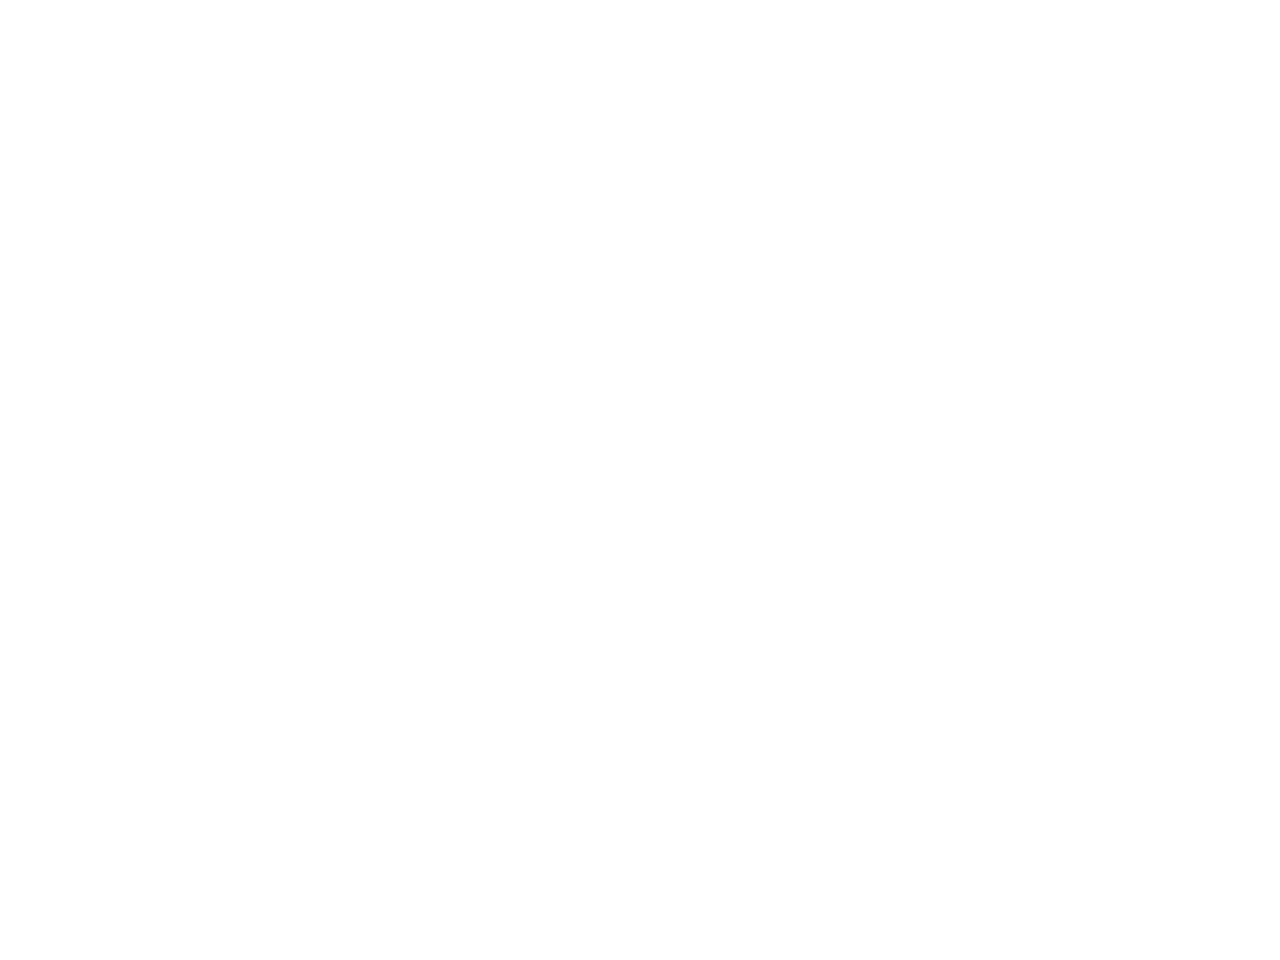

<IPython.core.display.Javascript object>


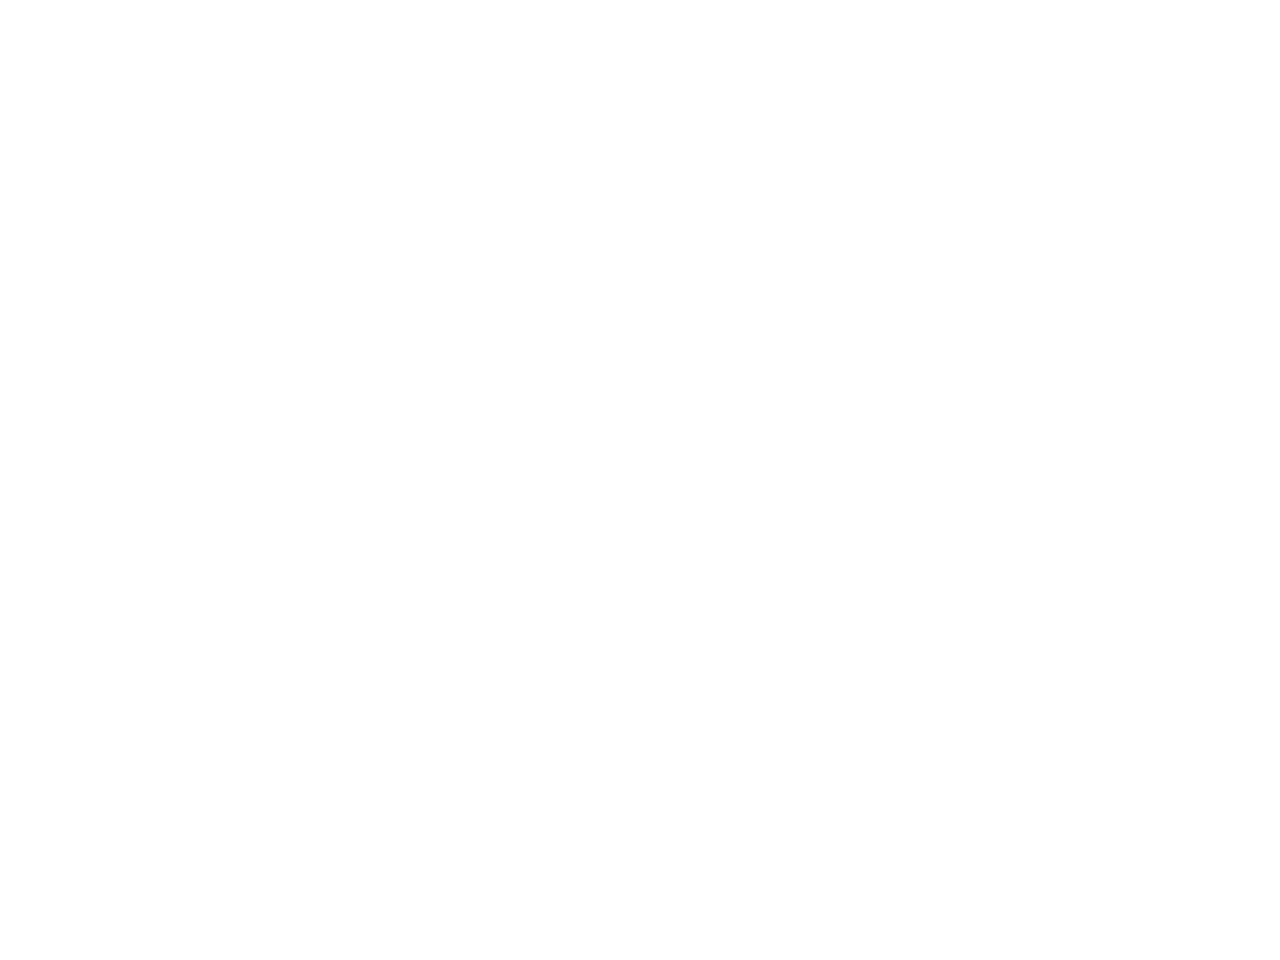

<IPython.core.display.Javascript object>


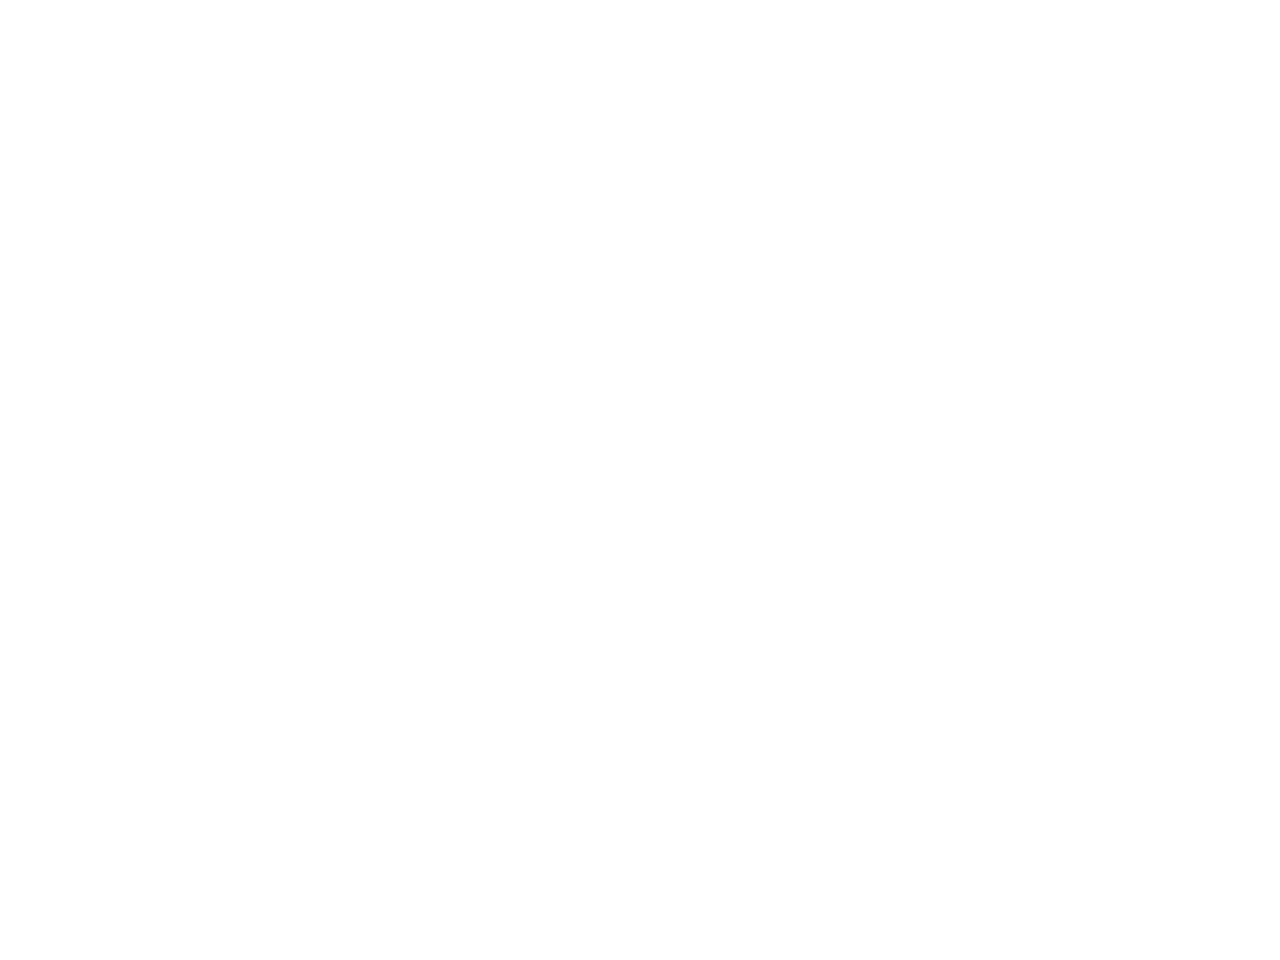

[[ 0.  2.  0.]
 [ 2.  2.  2.]
 [ 0.  2.  0.]]


<IPython.core.display.Javascript object>


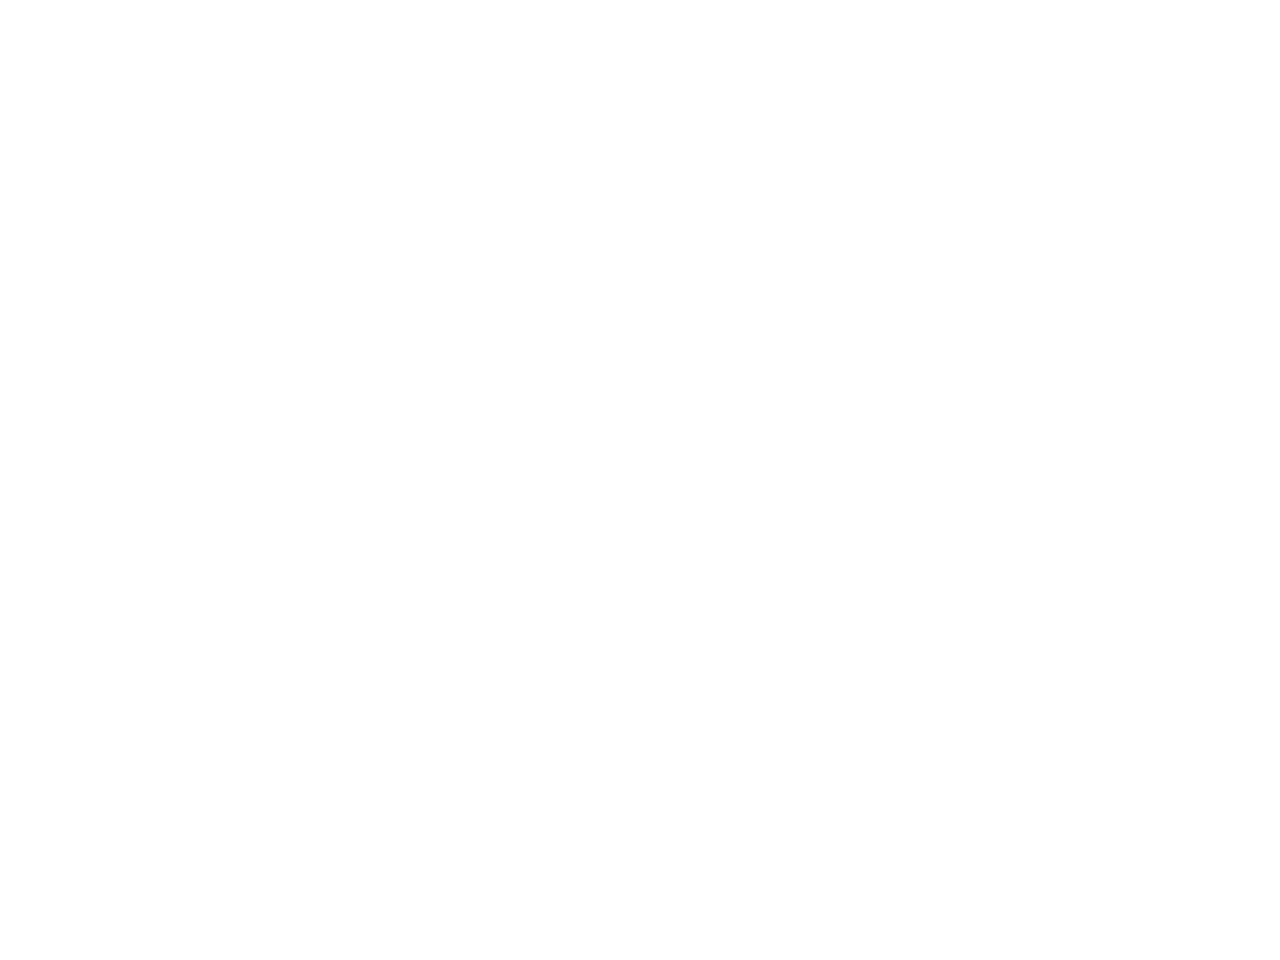

<IPython.core.display.Javascript object>


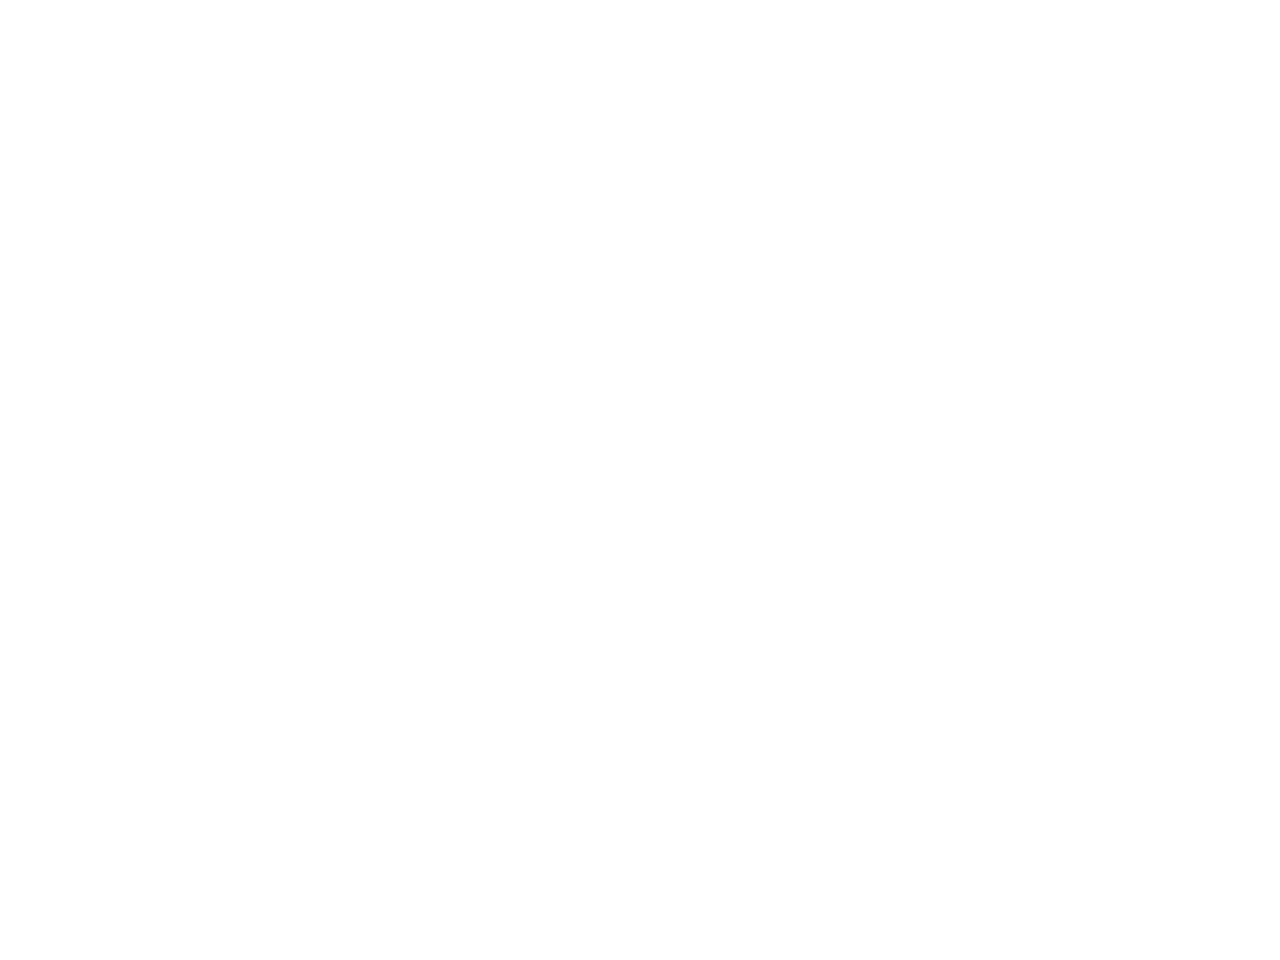

<IPython.core.display.Javascript object>


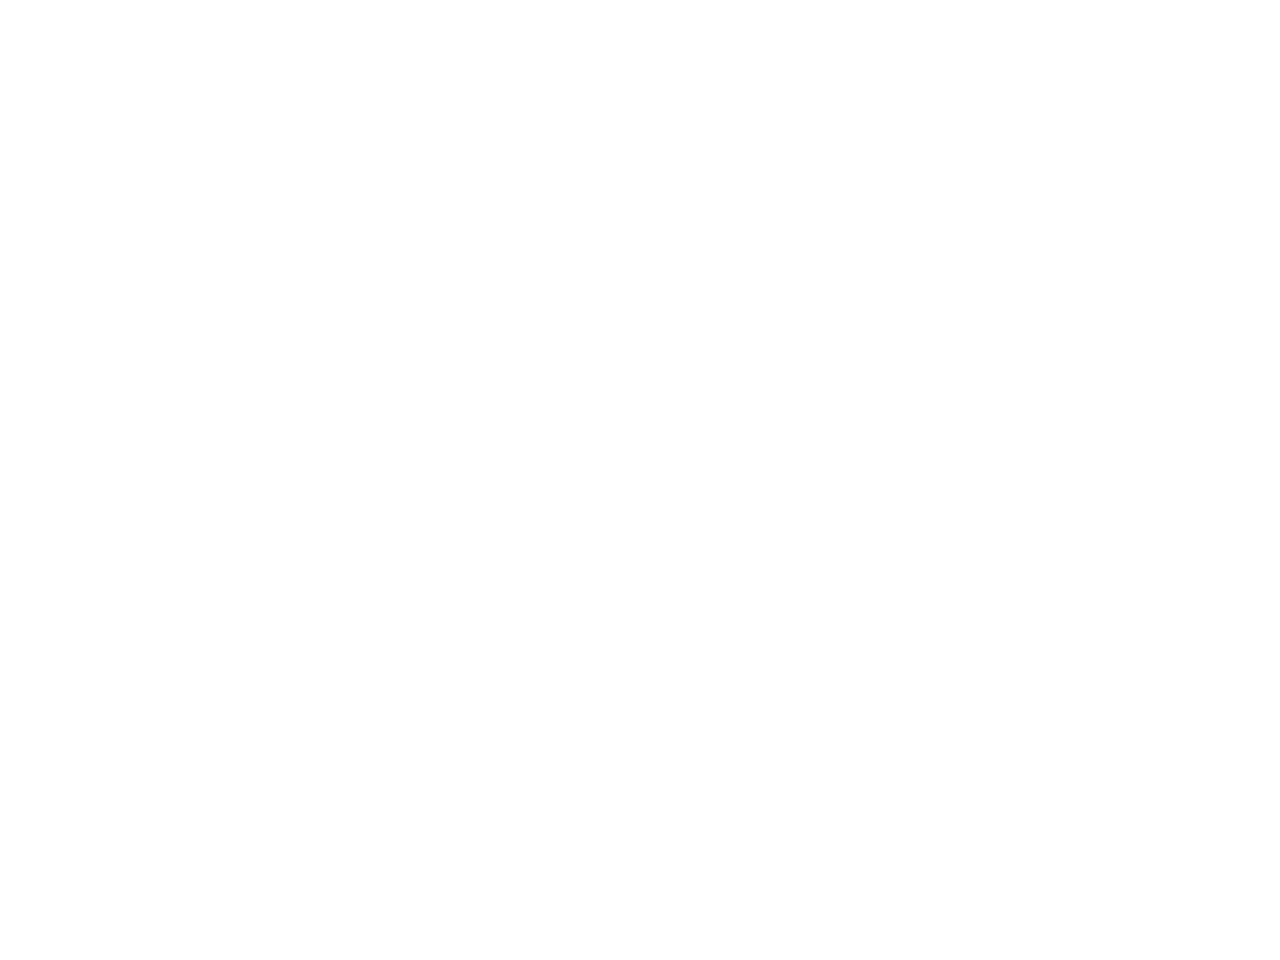

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [107]:
import librosa
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import Audio
%run 'PeakFinding.ipynb'
%matplotlib notebook

samples, fs = librosa.load(r"/Users/ji-macbook15/Desktop/moo/3.mp3", sr=44100, mono=True)



<IPython.core.display.Javascript object>


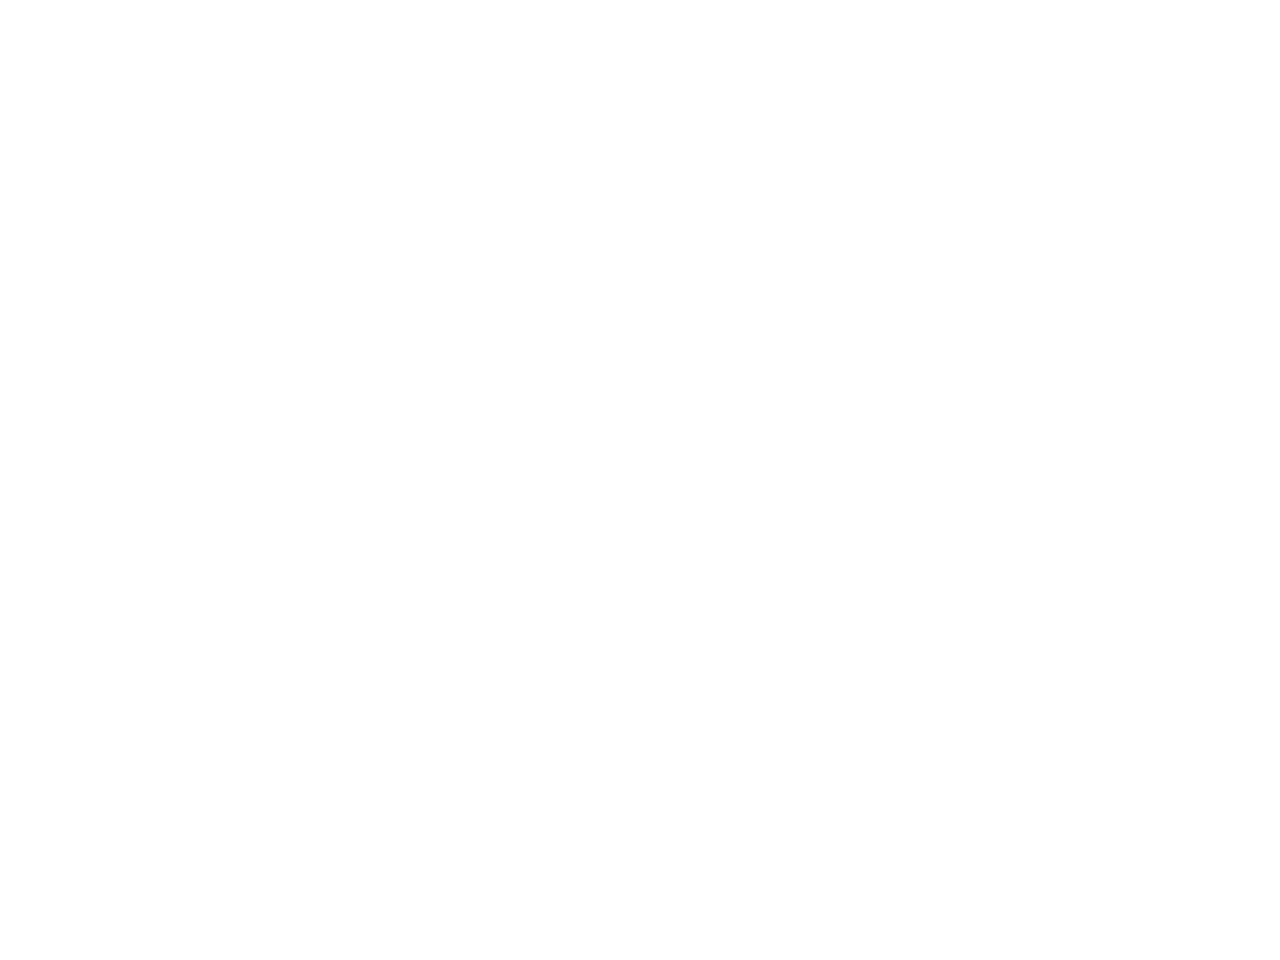

<IPython.core.display.Javascript object>


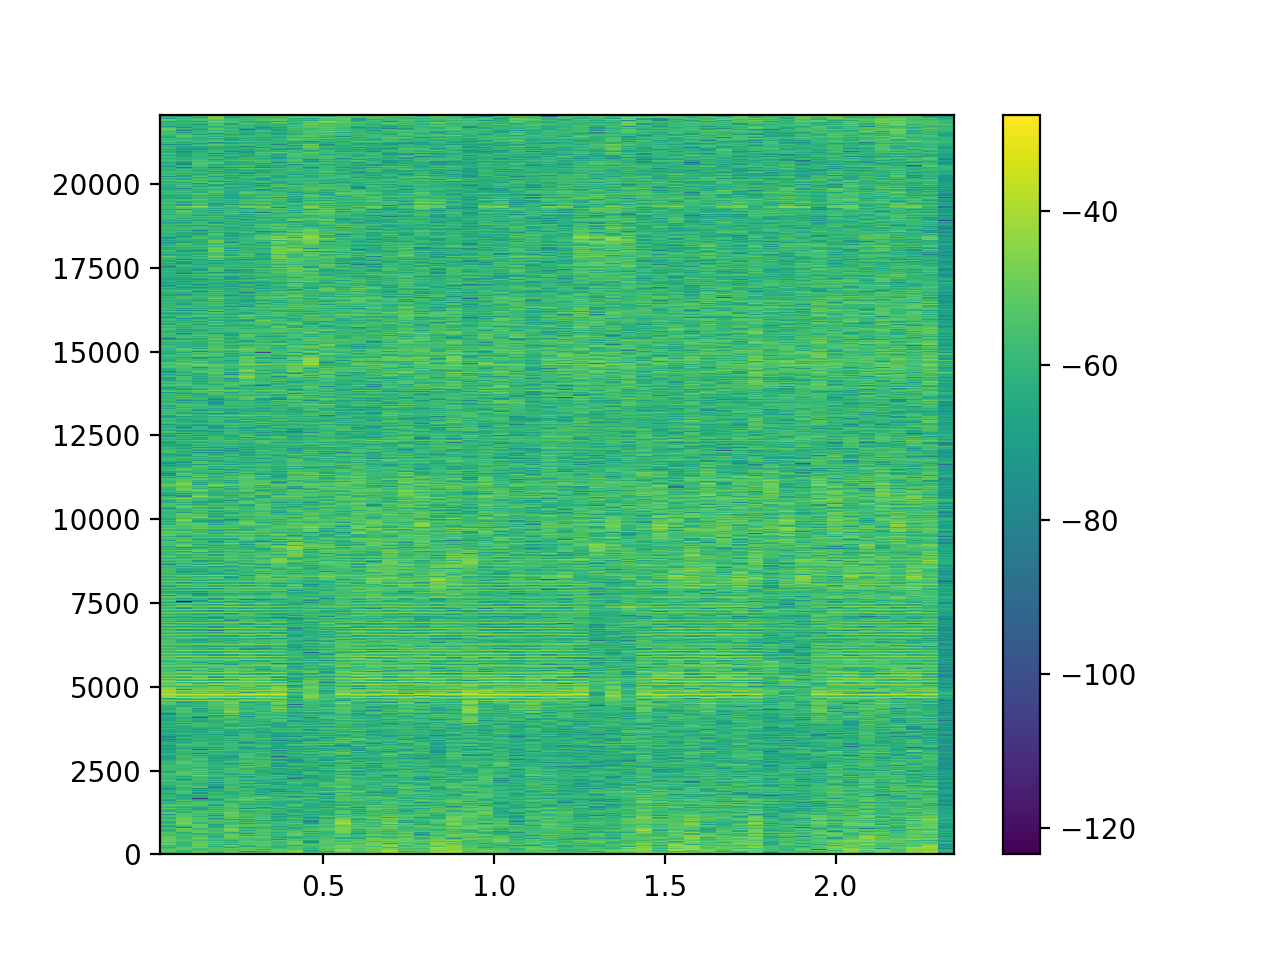

In [108]:
plt.figure(2)
fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(samples[::100], NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2))

fig.colorbar(im)  # adds colorbar to figure
Audio(samples[::100], rate=44100)

In [55]:
#sum(sum(peaks))
peaks = local_peaks_v2(S) #find all the local peaks within the spectrograph

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [57]:
a = np.where(peaks, S, 0) #say (x,y) is a coordinate in the peaks (boolean 2d array) that equals false --> the 
#correspoding location in the spectrograph will be zeroed
a.shape

(2049, 50)

In [130]:

bins = np.argwhere(a) #wherever in a (all but the local maxes have been 0) that equals 0 --> we remove that
bins.shape
realtime = [] #in index1 of bins, this represent the time bin. bin[i][1] == actual time(in secs)[i]
realfreq = [] #in index0 of bins, this represent the freq bin. freq[i][0] == actual freq(in hz)[i]
print(bins)
print(len(times))
print(len(freqs))
for i in range(bins.shape[0]):
    realtime.append(times[bins[i][1]]) 

for i in range(bins.shape[0]):
    realfreq.append(freqs[bins[i][0]])
realtimeandfreq = list(zip(realtime,realfreq)) #zip them into a (time, freq) pair
print(realtimeandfreq)


[[   0    5]
 [   0   22]
 [   0   35]
 ..., 
 [2047   36]
 [2047   42]
 [2048   32]]
50
2049
[(0.27863945578231292, 0.0), (1.0681179138321995, 0.0), (1.6718367346938776, 0.0), (1.9040362811791383, 0.0), (0.83591836734693881, 10.7666015625), (1.1609977324263039, 10.7666015625), (1.4396371882086167, 10.7666015625), (1.9969160997732427, 10.7666015625), (2.0897959183673471, 10.7666015625), (1.5325170068027212, 21.533203125), (1.7647165532879818, 21.533203125), (1.8575963718820863, 21.533203125), (0.60371882086167805, 32.2998046875), (1.0216780045351475, 32.2998046875), (1.3003174603174603, 32.2998046875), (1.4396371882086167, 32.2998046875), (0.13931972789115646, 43.06640625), (0.23219954648526078, 43.06640625), (0.4179591836734694, 43.06640625), (1.1609977324263039, 43.06640625), (1.9504761904761905, 43.06640625), (2.0433560090702949, 43.06640625), (2.1362358276643989, 43.06640625), (0.88235827664399091, 53.8330078125), (0.97523809523809524, 53.8330078125), (2.2755555555555556, 53.833007

In [ ]:
#print(S.shape)

#peaks2 = S[peaks]
#print(peaks2)
#print(peaks2.shape)
#fig, ax = plt.subplots()
